#### DECISION TREE 

* Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.
 Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.
It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

In [1]:
!pip install pydotplus

In [2]:
!pip install graphviz

In [3]:
### Importing necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.model_selection import train_test_split

In [122]:
import sklearn
print(sklearn.__version__)

1.4.2


In [5]:
from io import StringIO

In [6]:
df =pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [7]:
df.rename(columns={'Na_to_K': 'Sodium-Potassium level'}, inplace=True) #Renaming column

In [8]:
### INspecting the dataset

In [9]:
df.shape  # 200 rows and 6 columns

(200, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     200 non-null    int64  
 1   Sex                     200 non-null    object 
 2   BP                      200 non-null    object 
 3   Cholesterol             200 non-null    object 
 4   Sodium-Potassium level  200 non-null    float64
 5   Drug                    200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [11]:
## Clearly, it can be seen that there are no null values, and the dtypes of columns is int64, object, float64.

In [12]:
## statistical summary

In [13]:
df.describe() # for numerical columns

,Age,Sodium-Potassium level
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [14]:
# for categorical columns
df.describe(include=['object'])

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


In [15]:
df.nunique()

Age                        57
Sex                         2
BP                          3
Cholesterol                 2
Sodium-Potassium level    198
Drug                        5
dtype: int64

##### inferences
* Age has 57 unique values, indicating it is a continuous variable
* Sex has 2 unique values, suggesting it is a binary categorical variable
* Blood Pressure has 3 unique values, likely indicating different categories 
* Cholesterol has 2 unique values, possibly categorizing it into High/Low levels
* Sodium-Potassium level has 198 unique values, suggesting it is continuous
* Drug has 5 unique values, indicating multiple categories or types of drugs being considered.

In [17]:
df.duplicated().sum()

0

In [18]:
# no duplicates found

In [19]:
df.isna().sum() # no null values

Age                       0
Sex                       0
BP                        0
Cholesterol               0
Sodium-Potassium level    0
Drug                      0
dtype: int64

In [20]:
### Checking outliers

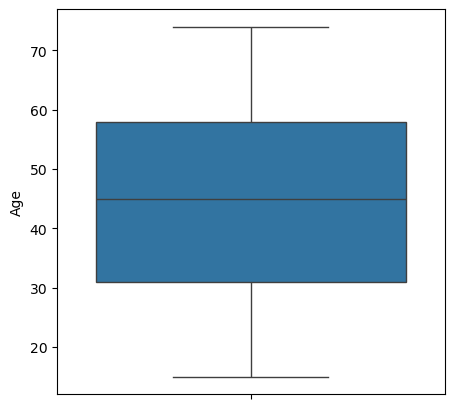

In [21]:
plt.figure(figsize=[5,5])
sns.boxplot(data=df,y=df['Age'])
plt.show()

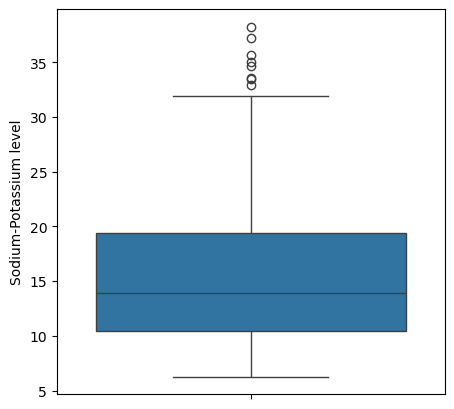

In [22]:
plt.figure(figsize=[5,5])
sns.boxplot(data=df,y=df['Sodium-Potassium level'])
plt.show()

In [23]:
#### there are few data points that differ significantly from most other points in a dataset.

In [24]:
#removing outliers
Q1=df["Sodium-Potassium level"].describe()["25%"]
Q3=df["Sodium-Potassium level"].describe()["75%"]
IQR= Q3-Q1
#LOWER_BOUND=Q1-1.5*IQR
UPPER_BOUND= Q3+1.5*IQR
df_no_outliers = df[(df['Sodium-Potassium level'] >= UPPER_BOUND)]
UPPER_BOUND= Q3+1.5*IQR
df["Sodium-Potassium level"]=np.where(df["Sodium-Potassium level"]>UPPER_BOUND,UPPER_BOUND,df["Sodium-Potassium level"])

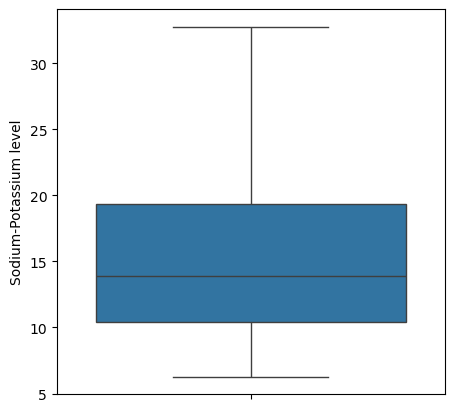

In [25]:
plt.figure(figsize=[5,5])
sns.boxplot(data=df,y=df['Sodium-Potassium level'])
plt.show()

In [26]:
Sex_percentage=df['Sex'].value_counts(normalize=True)*100

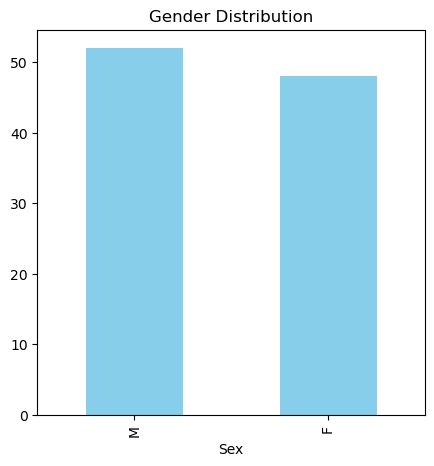

In [27]:
plt.figure(figsize=[5,5])
Sex_percentage.plot(kind='bar', color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.show()

In [28]:
BP_percentage=df['BP'].value_counts(normalize=True)*100

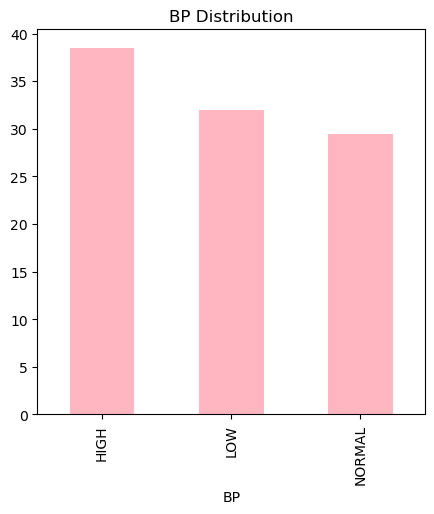

In [29]:
plt.figure(figsize=[5,5])
BP_percentage.plot(kind='bar', color='lightpink')
plt.title('BP Distribution')
plt.xlabel('BP')
plt.show()

In [30]:
Cholesterol_percentage=df['Cholesterol'].value_counts(normalize=True)*100

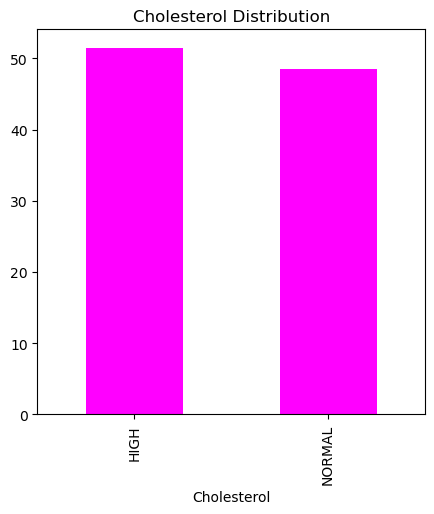

In [31]:
plt.figure(figsize=[5,5])
Cholesterol_percentage.plot(kind='bar', color='magenta')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.show()

In [32]:
Drug_percentage=df['Drug'].value_counts(normalize=True)*100

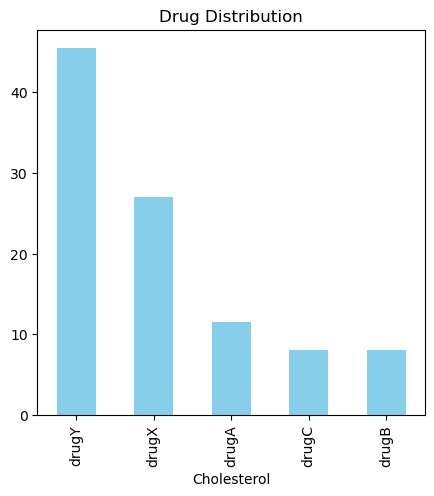

In [33]:
plt.figure(figsize=[5,5])
Drug_percentage.plot(kind='bar', color='skyblue')
plt.title('Drug Distribution')
plt.xlabel('Cholesterol')
plt.show()

In [34]:
# Majority of the pateints responded to drug Y

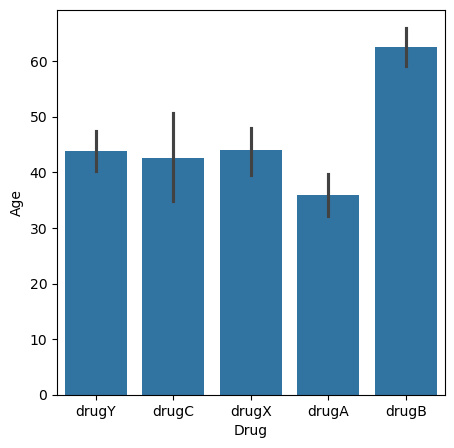

In [35]:
plt.figure(figsize=[5,5])
sns.barplot(data=df,x='Drug',y='Age')
plt.show() #bivariate analysis

In [36]:
# poeple who are 6p are mpsotly associated with druB


#### pd.crosstab() is a Pandas function used to compute a cross-tabulation of two or more categorical variables. It shows the frequency count of combinations of categories from each variable

In [38]:
cross_tabulation=pd.crosstab(df['Sex'],df['Drug'])
cross_tabulation

Drug,drugA,drugB,drugC,drugX,drugY
Sex,,,,,
F,9,6,7,27,47
M,14,10,9,27,44


##### INFERENCES
* 9 women took drugA, 6 took drugB, 7 took drugC, 27 took drugX, and 47 took drugY.
* 14 men took drugA, 10 took drugB, 9 took drugC, 27 took drugX, and 44 took drugY.

<Figure size 500x500 with 0 Axes>

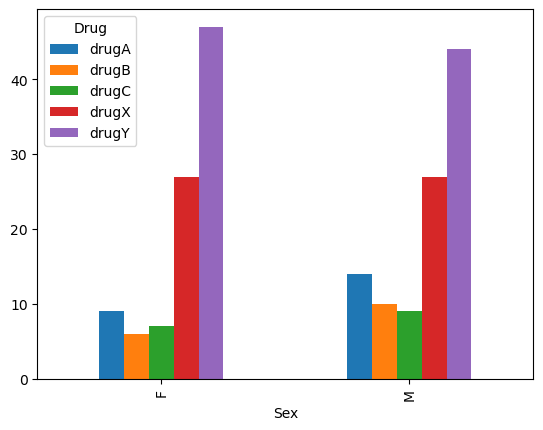

In [40]:
plt.figure(figsize=[5,5])
cross_tabulation.plot(kind='bar')
plt.show()

In [41]:
## Most of females and males responded to drug Y, followed by drug X
## Drug B and drug C are less found.

In [42]:
cross_tabulation2=pd.crosstab(df['BP'],df['Drug'])
cross_tabulation2

Drug,drugA,drugB,drugC,drugX,drugY
BP,,,,,
HIGH,23,16,0,0,38
LOW,0,0,16,18,30
NORMAL,0,0,0,36,23


<Figure size 500x500 with 0 Axes>

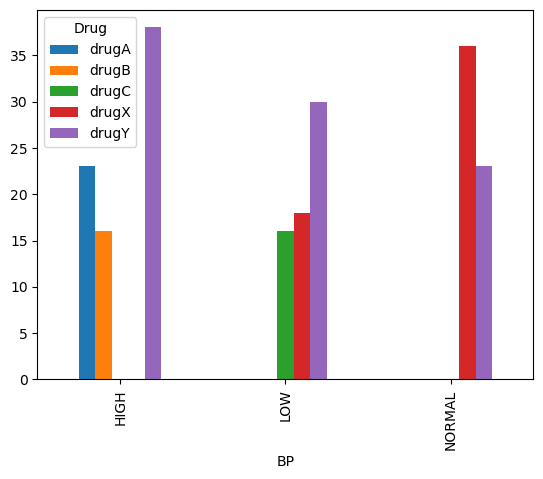

In [43]:
plt.figure(figsize=[5,5])
cross_tabulation2.plot(kind='bar')
plt.show()

In [44]:
# HIGH BLOOD PRESSURE PEOPLE RESPONDED MOST TO DRUG Y, WHEREAS DRUG C AND DRUG X WERE NOT FOUND AT ALL.
# PEOPLE WHO HAVE NORMAL BLOOD PRESSURE RESPONDED MOST TO DRUG X

In [45]:
cross_tabulation3=pd.crosstab(df['Cholesterol'],df['Drug'])
cross_tabulation3

Drug,drugA,drugB,drugC,drugX,drugY
Cholesterol,,,,,
HIGH,12,8,16,20,47
NORMAL,11,8,0,34,44


<Figure size 500x500 with 0 Axes>

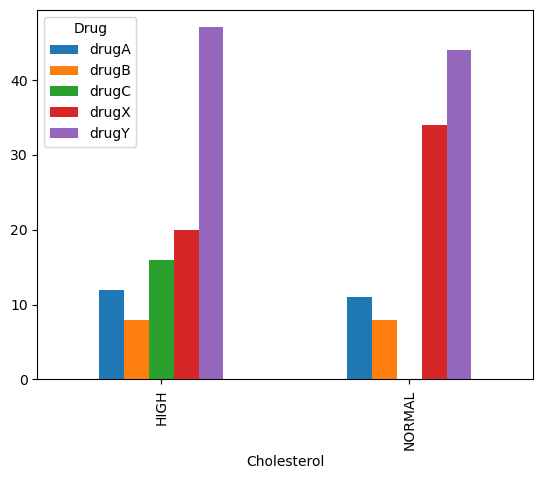

In [46]:
plt.figure(figsize=[5,5])
cross_tabulation3.plot(kind='bar')
plt.show()

In [47]:
# patients wioth high and low cholestrol responded mostly to drug Y, while least to drug b

In [48]:
X= df.drop('Drug', axis=1)
y=df['Drug'].copy()

In [49]:
# train_test split
X_train,X_test, y_train, y_test= train_test_split(X,y,train_size=0.7,random_state=100)

In [50]:
dt=DecisionTreeClassifier()

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [52]:
one_hot_encoder = ColumnTransformer(
    transformers=[
        ('sex_bp_chol', OneHotEncoder(), ['Sex', 'BP', 'Cholesterol'])  # Apply to 'Sex', 'BP', and 'Cholesterol'
    ],
    remainder='passthrough'  # Keep the other columns unchanged
)

# Apply encoding
X_encoded = one_hot_encoder.fit_transform(df)

# Convert the result to a DataFrame if needed and assign new column names
df_encoded = pd.DataFrame(X_encoded, columns=one_hot_encoder.get_feature_names_out())

# Display the encoded DataFrame
print(df_encoded.head())

  sex_bp_chol__Sex_F sex_bp_chol__Sex_M sex_bp_chol__BP_HIGH  \
0                1.0                0.0                  1.0   
1                0.0                1.0                  0.0   
2                0.0                1.0                  0.0   
3                1.0                0.0                  0.0   
4                1.0                0.0                  0.0   

  sex_bp_chol__BP_LOW sex_bp_chol__BP_NORMAL sex_bp_chol__Cholesterol_HIGH  \
0                 0.0                    0.0                           1.0   
1                 1.0                    0.0                           1.0   
2                 1.0                    0.0                           1.0   
3                 0.0                    1.0                           1.0   
4                 1.0                    0.0                           1.0   

  sex_bp_chol__Cholesterol_NORMAL remainder__Age  \
0                             0.0             23   
1                             0.0         

In [53]:
pipeline = Pipeline(steps=[
    ('preprocessor', one_hot_encoder),  # Apply OneHotEncoder to categorical columns
    ('classifier', DecisionTreeClassifier())  # Apply the classifier
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sex_bp_chol',
                                                  OneHotEncoder(),
                                                  ['Sex', 'BP',
                                                   'Cholesterol'])])),
                ('classifier', DecisionTreeClassifier())])

In [54]:
y_pred=pipeline.predict(X_test)
y_pred

array(['drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugB', 'drugX', 'drugY',
       'drugY', 'drugC', 'drugY', 'drugY', 'drugY', 'drugB', 'drugY',
       'drugY', 'drugY', 'drugB', 'drugY', 'drugY', 'drugY', 'drugC',
       'drugX', 'drugY', 'drugA', 'drugY', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugA', 'drugB', 'drugY', 'drugX',
       'drugX', 'drugX', 'drugC', 'drugA', 'drugY', 'drugY', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugY', 'drugB', 'drugY', 'drugC',
       'drugY', 'drugB', 'drugX', 'drugB'], dtype=object)

In [55]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9833333333333333


In [136]:
dt = pipeline.named_steps['classifier']

In [74]:
preprocessor = pipeline.named_steps['preprocessor']

#### Feature importance
* to understand which feature contributes most 

In [80]:
encoded_feature_names = preprocessor.get_feature_names_out()
encoded_feature_names

array(['sex_bp_chol__Sex_F', 'sex_bp_chol__Sex_M', 'sex_bp_chol__BP_HIGH',
       'sex_bp_chol__BP_LOW', 'sex_bp_chol__BP_NORMAL',
       'sex_bp_chol__Cholesterol_HIGH', 'sex_bp_chol__Cholesterol_NORMAL',
       'remainder__Age', 'remainder__Sodium-Potassium level'],
      dtype=object)

In [146]:
feature_importance =dt.feature_importances_
feature_importance

array([0.        , 0.        , 0.23343807, 0.05534645, 0.        ,
       0.12147469, 0.        , 0.1164992 , 0.47324159])

In [150]:
feature_importance_df = pd.DataFrame({
    'Feature': encoded_feature_names,
    'Importance': feature_importance
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
8,remainder__Sodium-Potassium level,0.473242
2,sex_bp_chol__BP_HIGH,0.233438
5,sex_bp_chol__Cholesterol_HIGH,0.121475
7,remainder__Age,0.116499
3,sex_bp_chol__BP_LOW,0.055346
0,sex_bp_chol__Sex_F,0.000000
1,sex_bp_chol__Sex_M,0.000000
4,sex_bp_chol__BP_NORMAL,0.000000
6,sex_bp_chol__Cholesterol_NORMAL,0.000000


##### The Sodium-Potassium level is the most important feature in predicting the drug response, contributing significantly (47.32%) to the decision-making process in the model.
##### High BP is the second most important feature with an importance of 23.34%.
##### High cholesterol is the third most influential feature, contributing 12.15%

In [94]:
dot_data= StringIO()

In [96]:
X_train.shape

(140, 5)

In [98]:
X_train.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Sodium-Potassium level'], dtype='object')

In [100]:
y_train.unique()

array(['drugY', 'drugX', 'drugA', 'drugC', 'drugB'], dtype=object)

In [102]:
feature_names = list(encoded_feature_names)
feature_names

['sex_bp_chol__Sex_F',
 'sex_bp_chol__Sex_M',
 'sex_bp_chol__BP_HIGH',
 'sex_bp_chol__BP_LOW',
 'sex_bp_chol__BP_NORMAL',
 'sex_bp_chol__Cholesterol_HIGH',
 'sex_bp_chol__Cholesterol_NORMAL',
 'remainder__Age',
 'remainder__Sodium-Potassium level']

In [104]:
class_names = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']

In [106]:
export_graphviz(dt, out_file=dot_data, filled=True, rounded= True, feature_names=feature_names, class_names=class_names, special_characters=True)

In [108]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [118]:
from sklearn.tree import plot_tree

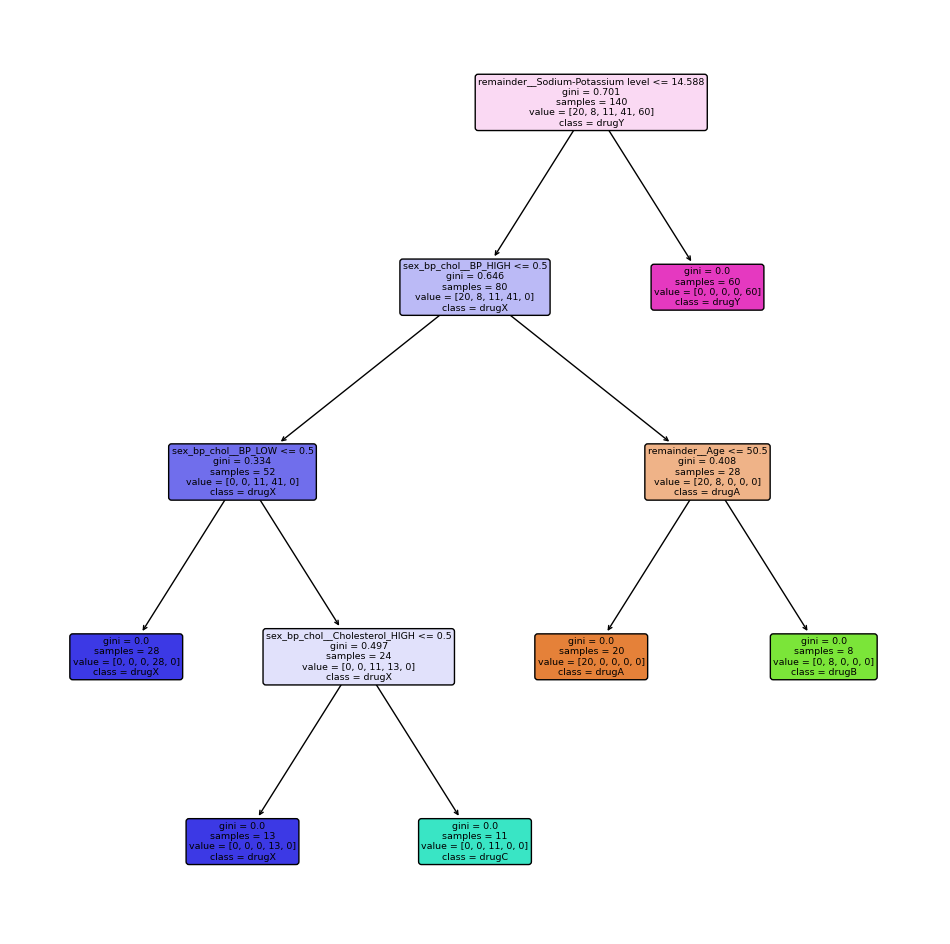

In [120]:
plt.figure(figsize=(12, 12))
plot_tree(dt, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()